<a href="https://colab.research.google.com/github/BakJungHo/PaCO/blob/main/%ED%9A%8C%EA%B7%80%EC%8B%A4%EC%8A%B5_%EC%9E%90%EC%A0%84%EA%B1%B0_%EB%8C%80%EC%97%AC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 자전거 데이터 확인

In [30]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings("ignore", category=RuntimeWarning)

bike_df = pd.read_csv('/content/drive/MyDrive/Sample_csv/bike_demand/train (1).csv')

print(bike_df.shape)
bike_df.head()

(10886, 12)


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [31]:
bike_df.isnull().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

## 데이터 타입, null값 확인

In [32]:
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [33]:
# 분자열을 datetime 타입으로 변경
bike_df['datetime']=bike_df.datetime.apply(pd.to_datetime)

# datetime 타입에서 년, 월, 일, 시간 추출
bike_df['year'] = bike_df.datetime.apply(lambda x : x.year)
bike_df['month'] = bike_df.datetime.apply(lambda x : x.month)
bike_df['day'] = bike_df.datetime.apply(lambda x : x.day)
bike_df['hour'] = bike_df.datetime.apply(lambda x : x.hour)
bike_df.head(3)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1,1,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,1,1,1
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,1,1,2


## 데이터 타입 변경 삭제

In [34]:
# Data type 확인 후 불필요한 목록 삭제
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    10886 non-null  datetime64[ns]
 1   season      10886 non-null  int64         
 2   holiday     10886 non-null  int64         
 3   workingday  10886 non-null  int64         
 4   weather     10886 non-null  int64         
 5   temp        10886 non-null  float64       
 6   atemp       10886 non-null  float64       
 7   humidity    10886 non-null  int64         
 8   windspeed   10886 non-null  float64       
 9   casual      10886 non-null  int64         
 10  registered  10886 non-null  int64         
 11  count       10886 non-null  int64         
 12  year        10886 non-null  int64         
 13  month       10886 non-null  int64         
 14  day         10886 non-null  int64         
 15  hour        10886 non-null  int64         
dtypes: datetime64[ns](1), 

In [35]:
drop_columns = ['datetime', 'casual', 'registered']
bike_df.drop(drop_columns, axis=1, inplace=True)

In [36]:
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      10886 non-null  int64  
 1   holiday     10886 non-null  int64  
 2   workingday  10886 non-null  int64  
 3   weather     10886 non-null  int64  
 4   temp        10886 non-null  float64
 5   atemp       10886 non-null  float64
 6   humidity    10886 non-null  int64  
 7   windspeed   10886 non-null  float64
 8   count       10886 non-null  int64  
 9   year        10886 non-null  int64  
 10  month       10886 non-null  int64  
 11  day         10886 non-null  int64  
 12  hour        10886 non-null  int64  
dtypes: float64(3), int64(10)
memory usage: 1.1 MB


## 에러 함수들 정의 후 선형회귀 학습/예측

In [37]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

# log값 변환 시 Nan등의 이슈로 log()가 아닌 loglp()를 이용하여 RMSLE 계산
def rmsle(y, pred):
  log_y = np.log1p(y)
  log_pred = np.log1p(pred)
  squared_error = (log_y - log_pred) ** 2
  rmsle = np.sqrt(np.mean(squared_error))
  return rmsle

  # RMSLE의 장점: 1. 아웃라이어가 있어도 큰 영향을 받지 않는다. 2. 상대적 error를 측정 3.Under Estimation에 큰 페널티를 부여

In [38]:
# 사이킷런의 mean_square_error()를 이용하여 RMSE 계산
def rmse(y, pred):
  return np.sqrt(mean_squared_error(y,pred))

# MAE, RMSE, RMSLE를 모두 계산
def evaluate_regr(y, pred):
  rmsle_val = rmsle(y, pred)
  rmse_val = rmse(y, pred)
  #MAE는 scikit learn의 mean_absolute_error()로 계산
  mae_val = mean_absolute_error(y, pred)
  print('RMSLE: {0:.3f}, RMSE: {1:.3f}, MAE:{2:.3f}'.format(rmsle_val, rmse_val, mae_val))

## 타깃 데이터의 로그 변환 
### 회귀 모델을 적용하기 전에 데이터 세트에 대해서 먼저 처리해야할 사항 2가지

* 결과값(타겟 데이터)가 정규 분포로 되어 있는가
* 카테고리형 데이터 셋을 One-Hot Encoding을 수행하였는가?

In [39]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso

y_target = bike_df['count']
X_features = bike_df.drop(['count'], axis=1, inplace=False)

X_train, X_test, y_train, y_test = train_test_split(X_features, y_target, test_size=0.3, random_state=0)

# 선형회귀 적용 후 학습 / 예측 평가
lr_reg = LinearRegression()
lr_reg.fit(X_train, y_train)
pred = lr_reg.predict(X_test)

evaluate_regr(y_test, pred)

# RMSLE에 비해 RMSE값이 매우 크게 나왔다. 예측 에러가 매우 큰 값들이 섞여 있기 때문
# 평가 지표는 예측 오류로서는 큰 값이므로, 현재 데이터가 제대로 전처리 되지 않은 부분이 존재한다는 것을 시사한다.

RMSLE: 1.165, RMSE: 140.900, MAE:105.924


## 예측값과 실제값 오차 확인

In [40]:
# 실제값과 예측값이 어느 정도 차이가 나는지 DF의 칼럼으로 만들어서 오류 값이 가장 큰 순으로 5개 확인
def get_top_error_data(y_test, pred, n_tops = 5):
  #DataFrame에 컬럼들로 실제 대여횟수(count)와 예측값을 서로 비교할 수 있도록 생성
  result_df = pd.DataFrame(y_test.values, columns=['real_count'])
  result_df['predicted_count'] = np.round(pred)
  result_df['diff'] = np.abs(result_df['real_count'] - result_df['predicted_count'])
  #예측값과 실제값이 가장 큰 데이터 순으로 출력
  print(result_df.sort_values('diff', ascending=False)[:n_tops])

get_top_error_data(y_test, pred, n_tops=5)

# 실제 자전거 대여 횟수와 예측 자전거 대여 횟수가 500회 이상 차이가 나는 것을 통해 예측 오류가 크다는 것을 확인할 수 있다.
# 이렇게 큰 예측 오류가 발생한다면 가장 먼저 살펴볼 것은 타깃값의 분포가 정규분포를 따르고 있는지를 확인하는 것이다.

      real_count  predicted_count   diff
1618         890            322.0  568.0
3151         798            241.0  557.0
966          884            327.0  557.0
412          745            194.0  551.0
2817         856            310.0  546.0


## 타겟값에 로그를 취해서 정규화

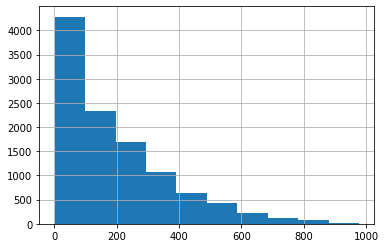

In [41]:
y_target.hist()

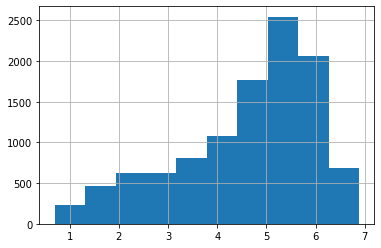

In [42]:
# 0~200 사이에 타겟 데이터가 몰려있는 경우 한쪽으로 쏠린 분포를 로그 변환을 통해 정규분포와 비슷한 형태로 변환할 수 있다.
y_log_transform = np.log1p(y_target) #np.log1p()함수를 사용한 이유는 0인 데이터의 경우 언더플로우 문제가 발생할 수 있기 때문이다.
y_log_transform.hist()

In [43]:
# 타겟 칼럼인 count 값을 log1p로 Log변환
y_target_log = np.log1p(y_target)

# 로그 변환된 y_target_log를 반영하여 학습/테스트 데이터 셋 분할
X_train, X_test, y_train, y_test = train_test_split(X_features, y_target_log, test_size=0.3, random_state=0)
lr_reg = LinearRegression()
lr_reg.fit(X_train, y_train)
pred = lr_reg.predict(X_test)

# 테스트 데이터 셋의 target값은 log 변환 되었으므로 다시 expml을 이용하여 원래의 scale로 변환
y_test_exp = np.expm1(y_test)

# 예측 값 역시 Log 변환된 타겟 기반으로 학습되어 예측되었으므로 다시 exmpl으로 scale변환
pred_exp = np.expm1(pred)

evaluate_regr(y_test_exp, pred_exp)

# 아직도 RMSLE에 비해 RMSE값이 매우 크게 나왔다. 
# 적절한 조치를 취해 주어도 성능 지표가 좋아지지 않거나 낮은 성능을 보이는 경우 해당 전처리 과정이 잘못되었을 가능성도 있지만 다른 전처리 과정이 추가적으로 필요한 경우도 있다.

RMSLE: 1.017, RMSE: 162.594, MAE:109.286


## 피쳐 별 회귀계수 확인

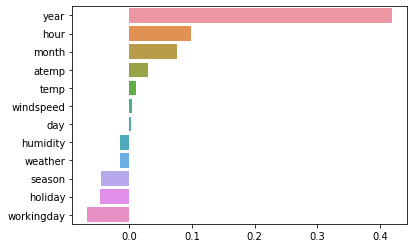

In [44]:
coef = pd.Series(lr_reg.coef_, index=X_features.columns)
coef_sort = coef.sort_values(ascending=False)
sns.barplot(x=coef_sort.values, y=coef_sort.index)

#선형 회귀 모델이 학습의 과정을 거쳐 각 피쳐에 대한 계수를 산출했을 때, 해당 계수가 크다면, 그만큼 결과에 큰 영향을 미치는 피저라는 것을 의미
# Year피처의 값이 독보적으로 큰 계수 값을 지닌다. 이는 숫자형 카테고리 값을 선형 회귀에 사용할 경우 회귀 계수를 연산할 때 이 숫자형 값에
# 크게 영향을 받는 경우가 발생할 수 있다. 이런 경우에는 원-핫 인코딩을 적용해 변환한다. [각 피쳐의 의미를 이해해야 적절한 전처리 과정을 판단할 수 있다]

## One-Hot Encoding 후 다시 학습/예측

In [45]:
# year, month, hour, season, weather, feature들을 One-Hot Encoding
X_features_ohe = pd.get_dummies(X_features, columns = ['year', 'month', 'hour', 'holiday', 'workingday', 'season', 'weather'])

In [46]:
# 원-핫 인코딩이 적용된 features 데이터 세트 기반으로 학습/예측 데이터 분할.
X_train, X_test, y_train, y_test = train_test_split(X_features_ohe, y_target_log, test_size=0.3, random_state=0)

# 모델과 학습/테스트 데이터 셋을 입력하면 성능 평가 수치를 반환
def get_model_predict(model, X_train, X_test, y_train, y_test, is_expm1= False):
  model.fit(X_train, y_train)
  pred = model.predict(X_test)
  if is_expm1 :
    y_test = np.expm1(y_test)
    pred = np.expm1(pred)
  print('###', model.__class__.__name__, '###')
  evaluate_regr(y_test, pred)

#end of function get_model_prediction

In [47]:
# model 별로 평가 수행
lr_reg = LinearRegression()
ridge_reg = Ridge(alpha=10)
lasso_reg = Lasso(alpha=0.01)

for model in [lr_reg, ridge_reg, lasso_reg] : 
  get_model_predict(model, X_train, X_test, y_train, y_test, is_expm1=True)

### LinearRegression ###
RMSLE: 0.589, RMSE: 97.483, MAE:63.106
### Ridge ###
RMSLE: 0.589, RMSE: 98.407, MAE:63.648
### Lasso ###
RMSLE: 0.634, RMSE: 113.031, MAE:72.658


## 원핫 인코딩 후 회귀 계수 확인

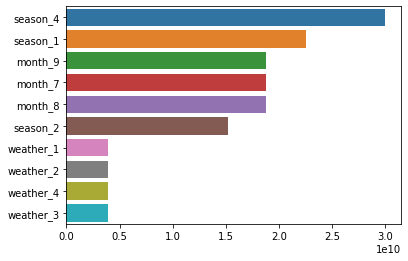

In [49]:
# 원핫 인코딩을 수행한 결과 예측 오류가 2/3 정도로 줄어든 것을 확인할 수 있다. 이번에는 어떤 피쳐가 예측 결과에 큰 영향을 주는지 계수 값이 큰 상위 10개를 선별하여 시각화해보자.

coef = pd.Series(lr_reg.coef_, index=X_features_ohe.columns)
coef_sort = coef.sort_values(ascending = False)[:10]
sns.barplot(x=coef_sort.values, y= coef_sort.index)

## 회귀 트리 모델을 이용하여 예측

In [51]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

In [56]:
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

# 랜덤 포레스트 GBM XGBOOST LightGBM model 별로 평가 수행
rf_reg = RandomForestRegressor(n_estimators =500)
gbm_reg = GradientBoostingRegressor(n_estimators=500)
xgb_reg = XGBRegressor(n_estimators = 500)
lgbm_reg = LGBMRegressor(n_estimators = 500)

for model in [rf_reg, gbm_reg, xgb_reg, lgbm_reg]:
  get_model_predict(model, X_train.values, X_test.values, y_train.values, y_test.values, is_expm1=True)
  #XGboost의 경우 df이 입력될 경우 버전에 따라 오류 발생 가능 ndarray로 변환

### RandomForestRegressor ###
RMSLE: 0.353, RMSE: 50.882, MAE:31.479
### GradientBoostingRegressor ###
RMSLE: 0.341, RMSE: 55.836, MAE:34.370
[05:00:27] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
### XGBRegressor ###
RMSLE: 0.346, RMSE: 56.474, MAE:34.917
### LGBMRegressor ###
RMSLE: 0.316, RMSE: 46.473, MAE:28.777
